In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 300)

## Lista 1:

In [33]:
df_1 = pd.read_csv("../bases/Vacinados Manaus.csv", delimiter=';', encoding='latin-1')
df_1.columns = [column.strip() for column in df_1.columns.to_list()]
df_1.shape

(2199, 9)

In [63]:
df_1['CPF'] = df_1['CPF'].apply(lambda x: x.strip().strip("'"))

In [37]:
df_1['lista_1'] = 'X'

## Lista 2:

In [28]:
df_2 = pd.read_excel("../bases/Vacinados Manaus.xlsx")
df_2.columns = [column.strip() for column in df_2.columns.to_list()]
df_2.shape

(3460, 9)

In [68]:
df_2['CPF'] = df_2['CPF'].astype(str)
df_2['CPF'] = df_2['CPF'].apply(lambda x: x.strip().strip("'"))
df_2['Grupo de'] = df_2['Grupo de'].apply(lambda x: x.strip())

In [73]:
df_merge = df_2.merge(df_1[['CPF', 'lista_1']], on='CPF', how='left')

# Análises:

In [83]:
print("Todos os nomes presentes na Lista 1 estão na Lista 2: {}".format((df_merge[df_merge['lista_1'].notna()].shape[0]) == df_1.shape[0]))

Todos os nomes presentes na Lista 1 estão na Lista 2: True


In [90]:
print("Números de CPFs que aparecem duas vezes na Lista 1: {}".format(sum(df_1['CPF'].duplicated())))
print("Números de CPFs que aparecem duas vezes na Lista 2: {}".format(sum(df_2['CPF'].duplicated())))

Números de CPFs que aparecem duas vezes na Lista 1: 0
Números de CPFs que aparecem duas vezes na Lista 2: 0


In [100]:
print("Quantidade de nomes duplicados: {} \n\n".format(sum(df_2['Nome Completo'].duplicated())))

df_2[df_2['Nome Completo'].duplicated(keep=False)]

Quantidade de nomes duplicados: 9 




,Nome Completo,CPF,Data da,Local de Vacinação,Grupo Prioritário,Grupo de,Lotação,Cargo/Função,
137,SELLY MONTEIRO PINTO,S7641815421,19/01/2021,OESTE - USF LEONOR DE FREITAS,Trabalhadores de Saúde,Técnico de Enfermagem,NaN,NaN,NaN
1057,PRISCILA NASCIMENTO DE LIMA,91014859204,20/01/2021,SUL - HOSPITAL PRONTO SOCORRO 28 DE AGOSTO,Trabalhadores de Saúde,Médico,NaN,NaN,NaN
1598,LUCIRENE DOS ANJOS DE ARAUJO,24031909268,20/01/2021,OESTE - USF DEODATO DE M. LEÃO,Trabalhadores de Saúde,Outros,{UNIDADE BASICA DE SAUDE O-33 (UBSO33)},"{,AGENTE COMUNITÁRIO DESAÚDE}",NaN
1600,LUCIRENE DOS ANJOS DE ARAUJO,40548511268,20/01/2021,OESTE - USF DEODATO DE M. LEÃO,Trabalhadores de Saúde,Outros,{UNIDADE BASICA DE SAUDE AJURICABA (UBSAJ)},"{,AUXILIAR DE PATOLOGIA CLÍNICA}",NaN
1622,NAIZE NASCIMENTO DA SILVA,68889402253,20/01/2021,OESTE - USF SANTOS DUMONT,Trabalhadores de Saúde,Outros,{UNIDADE BASICA DE SAUDE SANTOS DUMONT (UBSSD)},"{,AUXILIAR DE SERVIÇOS GERAIS}",NaN
1627,NAIZE NASCIMENTO DA SILVA,34267026220,20/01/2021,OESTE - USF SANTOS DUMONT,Trabalhadores de Saúde,Outros,{UNIDADE BASICA DE SAUDE SANTOS DUMONT (UBSSD)},"{,TÉCNICO EM ENFERMAGEM}",NaN
1768,MARIA ALCINEIDE FERREIRA DA SILVA,00693333278,20/01/2021,OESTE - USF LEONOR DE FREITAS,Trabalhadores de Saúde,Técnico de Enfermagem,NaN,NaN,NaN
1772,MARIA ALCINEIDE FERREIRA DA SILVA,67291635268,20/01/2021,OESTE - USF LEONOR DE FREITAS,Trabalhadores de Saúde,Técnico de Enfermagem,NaN,NaN,NaN
1917,WAGNER RODRIGO ARAUJO,01878585436,20/01/2021,OESTE - HOSPITAL E P S DA CRIANÇA DA ZONA OESTE,Trabalhadores de Saúde,Outros,NaN,NaN,NaN
1951,WAGNER RODRIGO ARAUJO,76870170215,20/01/2021,OESTE - HOSPITAL E P S DA CRIANÇA DA ZONA OESTE,Trabalhadores de Saúde,Outros,NaN,NaN,NaN


In [101]:
df_2.groupby('Grupo Prioritário').count()

,Nome Completo,CPF,Data da,Local de Vacinação,Grupo de,Lotação,Cargo/Função,
Grupo Prioritário,,,,,,,,
Trabalhadores da Educação,1,1,1,1,1,0,0,0
Trabalhadores de Saúde,3459,3459,3459,3459,3459,390,382,0


In [107]:
pd.set_option("display.max_rows", 100)

In [108]:
df_2.groupby("Cargo/Função").count()

,Nome Completo,CPF,Data da,Local de Vacinação,Grupo Prioritário,Grupo de,Lotação,
Cargo/Função,,,,,,,,
"{,,ASSISTENTE EM ADMINISTRAÇÃO,MÉDICO CLÍNICO GERAL}",1,1,1,1,1,1,1,0
"{,,AUXILIAR DE ENFERMAGEM}",1,1,1,1,1,1,1,0
"{,,AUXILIAR EM SAÚDE BUCAL}",1,1,1,1,1,1,1,0
"{,,COPEIRO,PESQUISADOR EXTENSIONISTA IV}",1,1,1,1,1,1,1,0
"{,,ENFERMEIRO GERAL}",2,2,2,2,2,2,2,0
"{,,MÉDICO CLÍNICO GERAL}",1,1,1,1,1,1,1,0
"{,,MÉDICO PATOLOGISTA/RDA,MÉDICOCLÍNICO GERAL}",1,1,1,1,1,1,1,0
"{,,MÉDICO PEDIATRA}",2,2,2,2,2,2,2,0
"{,,MÉDICO/PMMB,MÉDICO CLÍNICO GERAL}",1,1,1,1,1,1,1,0


In [175]:
df_2_lotacao = df_2.groupby('Lotação').count().reset_index()
df_2_lotacao = df_2_lotacao.sort_values('CPF', ascending=False)

In [190]:
df_2_lotacao

,Lotação,Nome Completo,CPF,Data da,Local de Vacinação,Grupo Prioritário,Grupo de,Cargo/Função,
56,{UNIDADE BASICA DE SAUDE ALFREDO CAMPOS},26,26,26,26,26,26,26,0
19,{DIVISAO DE ENFERMAGEM (MATMT)},20,20,20,20,20,20,20,0
131,{UNIDADE BASICA DE SAUDE SANTOS DUMONT (UBSSD)},19,19,19,19,19,19,19,0
13,{DIRETORIA DE ENFERMAGEM - SAMU},19,19,19,19,19,19,19,0
18,{DIVISAO CLINICA - MMT},17,17,17,17,17,17,17,0
65,{UNIDADE BASICA DE SAUDE DEODATO DE MIRANDA L...,13,13,13,13,13,13,13,0
8,{CLINICA DA FAMILIA SENADOR SEVERIANO NUNES},10,10,10,10,10,10,10,0
80,{UNIDADE BASICA DE SAUDE GEBES DE MEDEIROS},8,8,8,8,8,8,8,0
15,{DIRETORIA TÉCNICA - SAMU},8,8,8,8,8,8,8,0
0,,8,8,8,8,8,8,0,0


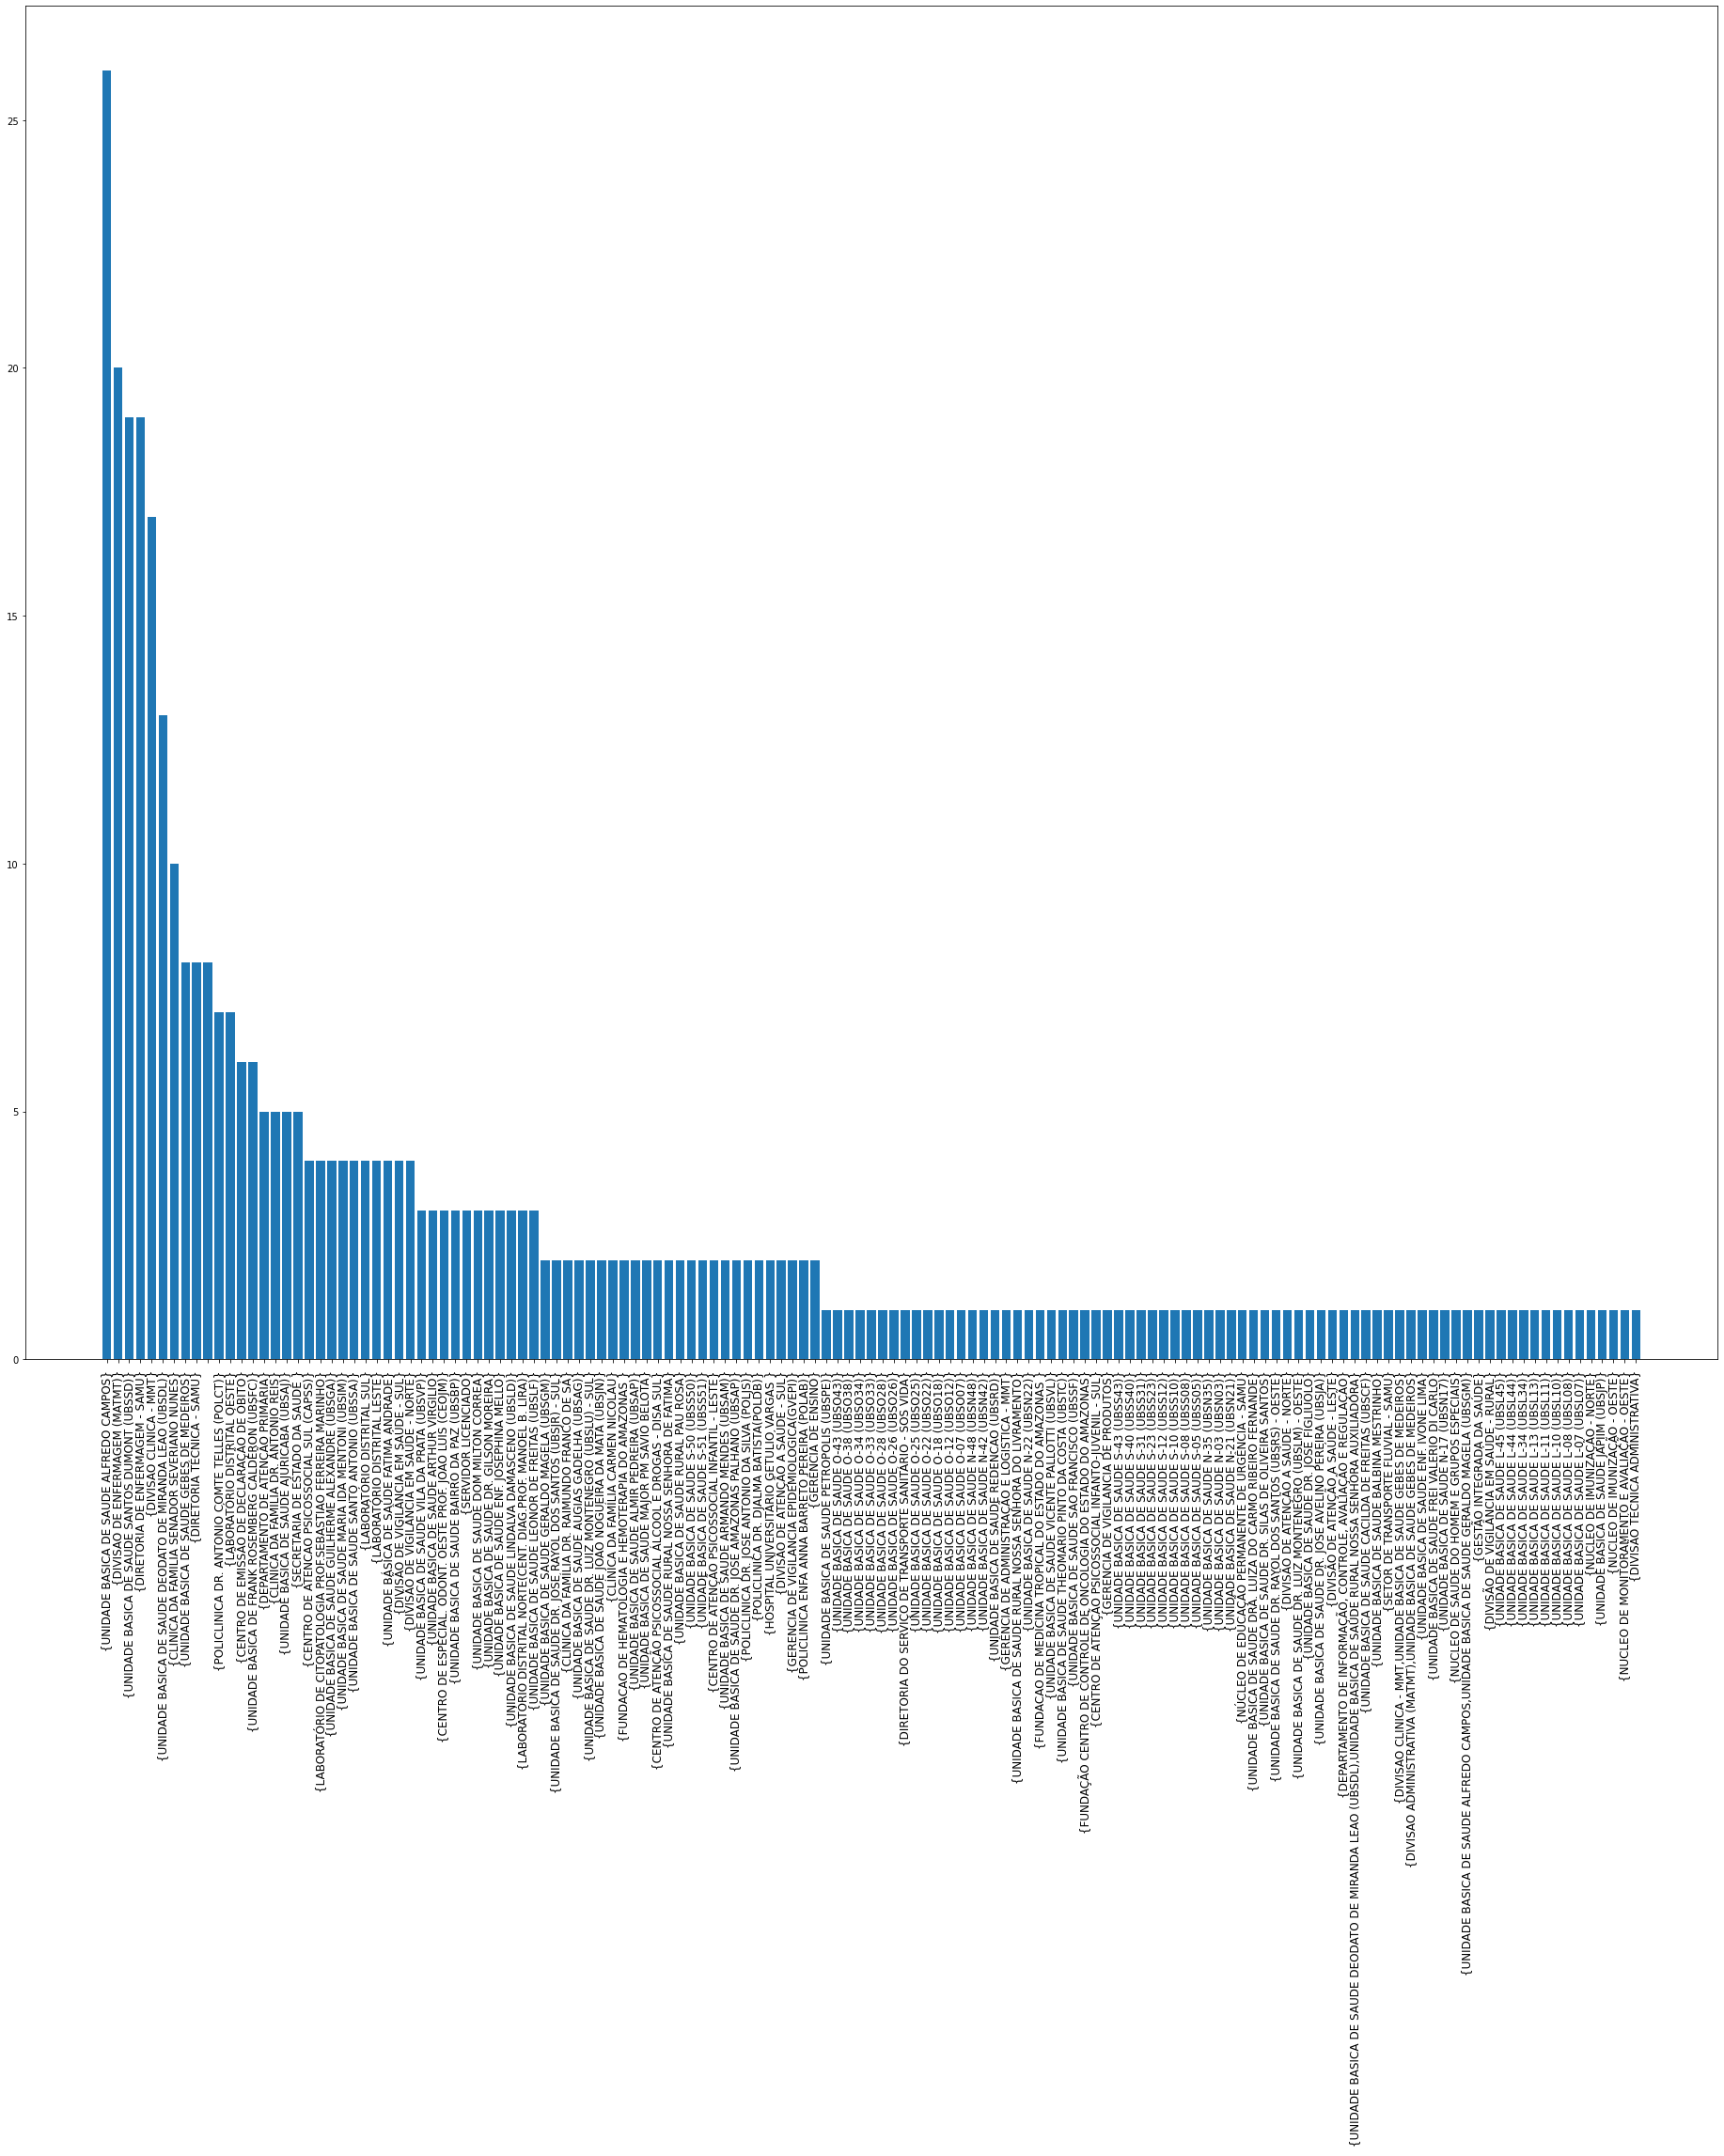

In [193]:
fig = plt.figure(figsize=(25,20))
ax = fig.add_axes([0,0,1,1])
langs = df_2_lotacao['Lotação']
quantidade = df_2_lotacao['CPF']
ax.bar(langs,quantidade)
plt.xticks(rotation=90, fontsize=12)

# rects = ax.patches

# for rect, label in zip(rects, quantidade):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
#             ha='center', va='bottom')

plt.show()

In [136]:
df_2_profissoes = df_2.groupby('Grupo de').count().reset_index()[['Grupo de', 'CPF']].reset_index(drop=True)
df_2_profissoes = df_2_profissoes.sort_values('CPF', ascending=False)

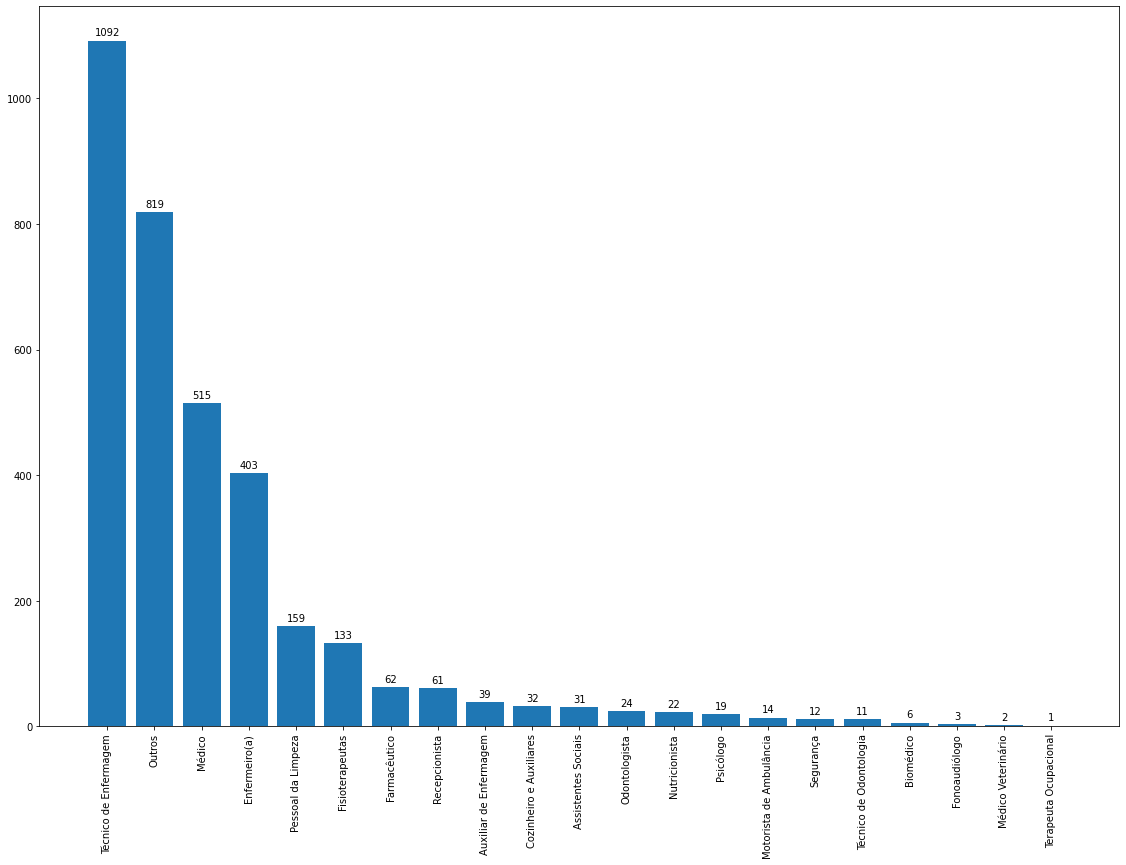

In [162]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
langs = df_2_profissoes['Grupo de']
quantidade = df_2_profissoes['CPF']
ax.bar(langs,quantidade)
plt.xticks(rotation=90)

rects = ax.patches

for rect, label in zip(rects, quantidade):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

plt.show()

## Categoria de funcionários 'OUTROS':

In [123]:
df_outros = df_2[df_2['Grupo de'] == 'Outros']

In [163]:
df_outros.groupby('Grupo Prioritário').count()

,Nome Completo,CPF,Data da,Local de Vacinação,Grupo de,Lotação,Cargo/Função,
Grupo Prioritário,,,,,,,,
Trabalhadores de Saúde,819,819,819,819,819,128,128,0


In [195]:
print("Dentro da categoria 'OUTROS', existem {} nomes repetidos com CPFs diferentes.".format(sum(df_outros['Nome Completo'].duplicated())))

Dentro da categoria 'OUTROS', existem 3 nomes repetidos com CPFs diferentes.


In [197]:
df_outros[df_outros['Nome Completo'].duplicated(keep=False)]

,Nome Completo,CPF,Data da,Local de Vacinação,Grupo Prioritário,Grupo de,Lotação,Cargo/Função,
1598,LUCIRENE DOS ANJOS DE ARAUJO,24031909268,20/01/2021,OESTE - USF DEODATO DE M. LEÃO,Trabalhadores de Saúde,Outros,{UNIDADE BASICA DE SAUDE O-33 (UBSO33)},"{,AGENTE COMUNITÁRIO DESAÚDE}",NaN
1600,LUCIRENE DOS ANJOS DE ARAUJO,40548511268,20/01/2021,OESTE - USF DEODATO DE M. LEÃO,Trabalhadores de Saúde,Outros,{UNIDADE BASICA DE SAUDE AJURICABA (UBSAJ)},"{,AUXILIAR DE PATOLOGIA CLÍNICA}",NaN
1622,NAIZE NASCIMENTO DA SILVA,68889402253,20/01/2021,OESTE - USF SANTOS DUMONT,Trabalhadores de Saúde,Outros,{UNIDADE BASICA DE SAUDE SANTOS DUMONT (UBSSD)},"{,AUXILIAR DE SERVIÇOS GERAIS}",NaN
1627,NAIZE NASCIMENTO DA SILVA,34267026220,20/01/2021,OESTE - USF SANTOS DUMONT,Trabalhadores de Saúde,Outros,{UNIDADE BASICA DE SAUDE SANTOS DUMONT (UBSSD)},"{,TÉCNICO EM ENFERMAGEM}",NaN
1917,WAGNER RODRIGO ARAUJO,01878585436,20/01/2021,OESTE - HOSPITAL E P S DA CRIANÇA DA ZONA OESTE,Trabalhadores de Saúde,Outros,NaN,NaN,NaN
1951,WAGNER RODRIGO ARAUJO,76870170215,20/01/2021,OESTE - HOSPITAL E P S DA CRIANÇA DA ZONA OESTE,Trabalhadores de Saúde,Outros,NaN,NaN,NaN
